# Startup with pymascdb
We see here some of the most important functionalities of *pymascdb*, including the *MASC_DB* class and some of the useful functions of this module. 

**This is only a selection of functionalities. See on github (pymascdb/tutorials/) for much more details**

##  The MASC_DB instance
We now see how to import all the dataset into a MASC_DB instance and how the instance can be used to play with the data

In [ ]:
# Imports
from mascdb.api import MASC_DB

dir_path = "/data/MASC_DB"  # It must contains the 4 parquet files and the Zarr storage

# Create MASC_DB instance
mascdb = MASC_DB(dir_path=dir_path)

### Units and explanation of variables
If you are lost with the many variables/columns in the dataframes *mascdb.camX* (X = 0,1,2) or *mascdb.triplet*, here some utility functions to help you out

In [ ]:
# Utils to get information of any variable/column in mascdb.camX (0,1,2) or mascdb.triplet
mascdb.get_var_units("flake_Dmax")  # Get units of flake_Dmax

'm'

In [ ]:
mascdb.get_var_explanation("flake_Dmax")  # Get a verbose explanation of flake_Dmax

'Maximum value of Dmax among the three individual ROIs (one for each camera). Used as a proxy for the true Dmax of the snowflake'

### Precipitation events and campaign summaries
Some built-in utils can be used to discriminate between different precipitation events or to get a summary of each field campaign.

In [ ]:
# Automatically identify precipitation events (see options)
event_summary = mascdb.event  # summary and id of each precip event
print(event_summary.campaign)
print(event_summary.columns)

0      APRES3-2016
1      APRES3-2016
2      APRES3-2016
3      APRES3-2016
4      APRES3-2016
          ...     
932    Valais-2016
933    Valais-2016
934    Valais-2016
935    Valais-2016
936    Valais-2016
Name: campaign, Length: 937, dtype: string
Index(['event_id', 'event_duration', 'event_n_triplets', 'campaign',
       'latitude', 'longitude', 'altitude', 'month', 'year', 'start_time',
       'end_time'],
      dtype='object')


In [ ]:
# Summarize the datasets of each separate field campaign
campaign_summary = mascdb.campaign
print(campaign_summary.precipitation_class)
print(campaign_summary.columns)

{'mixed': 14545, 'precip': 2294, 'blowing_snow': 491, 'undefined': 23}
Index(['start_time', 'end_time', 'latitude', 'longitude', 'altitude',
       'n_triplets', 'n_events', 'event_duration_min', 'event_duration_mean',
       'event_duration_max', 'total_event_duration', 'snowflake_class',
       'riming_class', 'melting_class', 'precipitation_class'],
      dtype='object')


### Subsetting 
The dataset can be subset in various ways, for example according to values of columns in cam0, cam1, cam2 or triplet

In [ ]:
# Subset specific rows with boolean indices
# - Boolean indices must have same length of the database
idx = mascdb.triplet["flake_Dmax"] > 0.02
mascdb_largeD = mascdb.isel(idx)  # Kept only flakes with max(Dmax) among the cameras larger than 2 cm

### Sorting 
The dataset can be sorted in increasing or decreasing orders of some variables. For example according to quality $\xi$ or according to $D_{max}$. This can be done on values of individual cams, like cam0 in this example.

/home/grazioli/anaconda3/envs/mascdb/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing with an out-of-order index is generating 251 times more chunks
  return self.array[key]


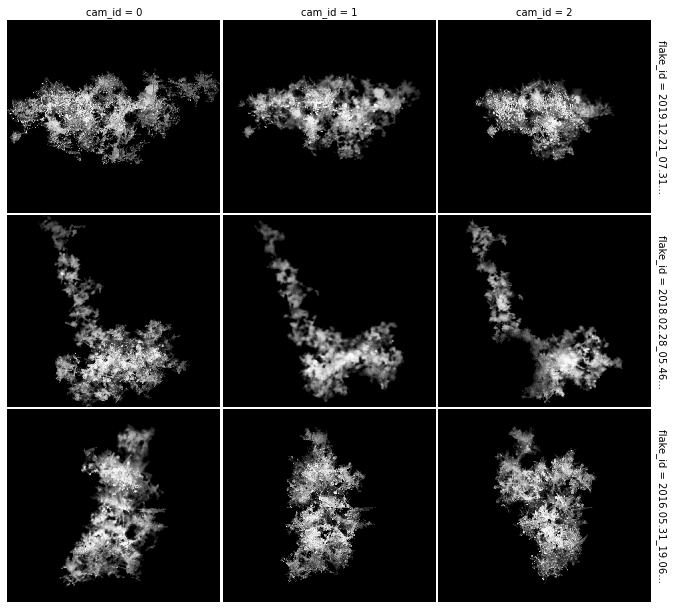

In [ ]:
# Sort by decreasing snowflake diameter of CAM0
mascdb_largeD = mascdb.arrange("cam0.Dmax", decreasing=True)
mascdb_largeD.cam0["Dmax"]
mascdb_largeD.plot_triplets(n_triplets=3)  # Plot the first three biggest triplets

/home/grazioli/anaconda3/envs/mascdb/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing with an out-of-order index is generating 251 times more chunks
  return self.array[key]


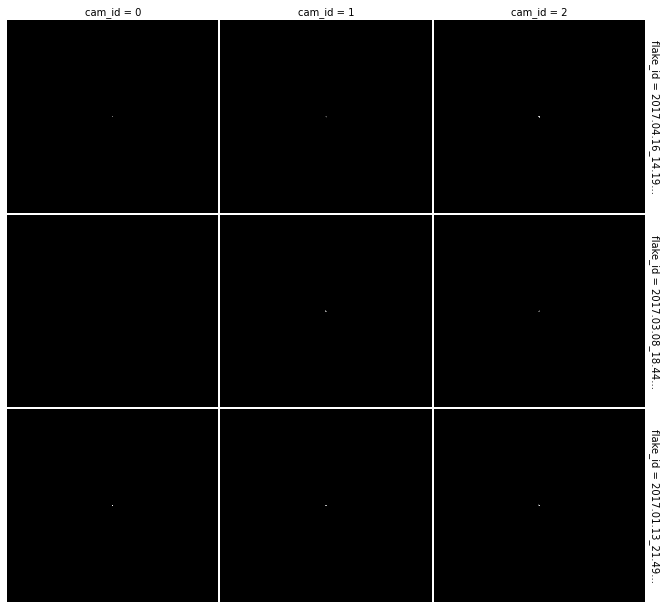

In [ ]:
# Sort by increasing snowflake diameter of CAM0
mascdb_smallD = mascdb.arrange("cam0.Dmax", decreasing=False)
mascdb_smallD.cam0["Dmax"]
mascdb_smallD.plot_triplets(n_triplets=3, zoom=False)  # Plot the first three smallest triplets

### Selection and filtering
Additional tools allow to select a subset of the full MASC_DB instance based on fast filters. In the example below, we keep only a certain number (5 in the example) of observations corresponding to the lowest or highest values of $D_{max}$ in a given camera view. Or alternative, we can do the same using environmental information (keeping for example the lowest temperatures)- 

In [ ]:
dmax_max_0 = mascdb.select_max("cam0.Dmax", n=5)  # keep top 5 Dmax in cam0
dmax_min_0 = mascdb.select_min("cam0.Dmax", n=5)  # keep bottom 5 Dmax in cam 0

min_t = mascdb.select_min("env.T", n=5)  # keep lowest 5 temperature records

/home/grazioli/anaconda3/envs/mascdb/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing with an out-of-order index is generating 251 times more chunks
  return self.array[key]
/home/grazioli/anaconda3/envs/mascdb/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing with an out-of-order index is generating 251 times more chunks
  return self.array[key]
/home/grazioli/anaconda3/envs/mascdb/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing with an out-of-order index is generating 37 times more chunks
  return self.array[key]
